<a href="https://colab.research.google.com/github/ArnAV318/Ml_notebooks/blob/master/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --user=your_username --password=your_password https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip

--2019-07-22 04:38:14--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.196
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  13.2MB/s    in 75s     

2019-07-22 04:39:30 (12.1 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/datasets/data')


In [0]:
!ls

my_model.h5  plot.png		    test      train
outfile      sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
!ls

disti.png    outfile   sample_submission.csv  test.csv	train.csv
my_model.h5  plot.png  test		      train


In [0]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    """model = Sequential()
    inputShape = (height, width, depth)
    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
    # first set of CONV => RELU => POOL layers
    model.add(Conv2D(64, (5, 5), padding="same",
			input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(64, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters =128, kernel_size = (5,5),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters =128, kernel_size = (5,5),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters =192, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(filters =256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    # return the constructed network architecture
    return model"""
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96,96,3))
    CLASSES = 103
    
    #model = Model(inputs=base_model.input, outputs=predictions)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(CLASSES, activation='softmax'))
    
    return model

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

Using TensorFlow backend.


In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/datasets/data'

In [0]:
EPOCHS = 25
INIT_LR = 1e-3
print(INIT_LR)
BS = 32
 
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
 
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images("./train")))
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths[0])

0.001
[INFO] loading images...
./train/5766.jpg


In [0]:
for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (96, 96))
	image = img_to_array(image)
	data.append(image)
  

In [0]:
train.head()

print(train.iloc[0]['category'])
print(str(imagePaths[0].split(os.path.sep)[-1])[0:-4:])
for imagePath in imagePaths:
  labels.append(train.iloc[int(str(imagePath.split(os.path.sep)[-1])[0:-4:])]['category'])
print(labels[0])

77
5766
67


In [0]:
os.mkdir("sortedtrain")
os.chdir("./sortedtrain")
for i in range(1,103):
  os.mkdir(str(i))
os.chdir("./..")

In [0]:
for i in range(len(labels)):
  
  p=imagePaths[i]
  q="./sortedtrain/"+str(labels[i])
  !mv $p $q

mv: cannot move './train/12614.jpg' to './sortedtrain/13': No such file or directory
mv: cannot move './train/8028.jpg' to './sortedtrain/96': No such file or directory
mv: cannot move './train/13096.jpg' to './sortedtrain/74': No such file or directory
mv: cannot move './train/10197.jpg' to './sortedtrain/44': No such file or directory
mv: cannot move './train/4137.jpg' to './sortedtrain/66': No such file or directory
mv: cannot move './train/4930.jpg' to './sortedtrain/76': No such file or directory


KeyboardInterrupt: ignored

In [0]:
print(i)
print(len(labels))

1267
18540


In [0]:
!ls

from shutil import copy2
for i in range(len(labels)):
  src=imagePaths[i]
  dst="./sortedtrain/"
  dst=dst+str(labels[i])
  copy2(src, dst)
  

disti.png    outfile   sample_submission.csv  test	train
my_model.h5  plot.png  sortedtrain	      test.csv	train.csv


In [0]:
nums=[0]*103
for a in labels:
  nums[a]+=1
plt.plot([x for x in range(103)],nums)
plt.savefig("disti.png")

In [0]:
data = np.array(data1, dtype="float") / 255.0
labels = np.array(labels)
 
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [0]:
print("[INFO] compiling model...")
model = LeNet.build(width=96, height=96, depth=3, classes=103)
opt = Adam(lr=3*INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["categorical_accuracy"])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' , metrics=['accuracy'])
#from keras.optimizers import SGD
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')
#model.compile(optimizer='rmsprop',
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers



# train the network
print("[INFO] training network...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)
 
# save the model to disk
print("[INFO] serializing network...")
model.save("my_model.h5")

[INFO] compiling model...
[INFO] training network...
Epoch 1/25
434/434 [==============================] - 70s 162ms/step - loss: 0.0615 - categorical_accuracy: 0.0314 - val_loss: 0.2053 - val_categorical_accuracy: 0.0244
Epoch 2/25
434/434 [==============================] - 50s 115ms/step - loss: 0.0599 - categorical_accuracy: 0.0484 - val_loss: 0.0583 - val_categorical_accuracy: 0.0229
Epoch 3/25
434/434 [==============================] - 50s 116ms/step - loss: 0.0570 - categorical_accuracy: 0.0677 - val_loss: 0.3039 - val_categorical_accuracy: 0.0235
Epoch 4/25
434/434 [==============================] - 50s 116ms/step - loss: 0.0572 - categorical_accuracy: 0.0580 - val_loss: 0.0588 - val_categorical_accuracy: 0.0557
Epoch 5/25
434/434 [==============================] - 51s 117ms/step - loss: 0.0571 - categorical_accuracy: 0.0621 - val_loss: 0.0697 - val_categorical_accuracy: 0.0529
Epoch 6/25
434/434 [==============================] - 50s 116ms/step - loss: 0.0571 - categorical_accu

KeyboardInterrupt: ignored

In [0]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")
!ls

my_model.h5  plot.png  sample_submission.csv  test  test.csv  train  train.csv


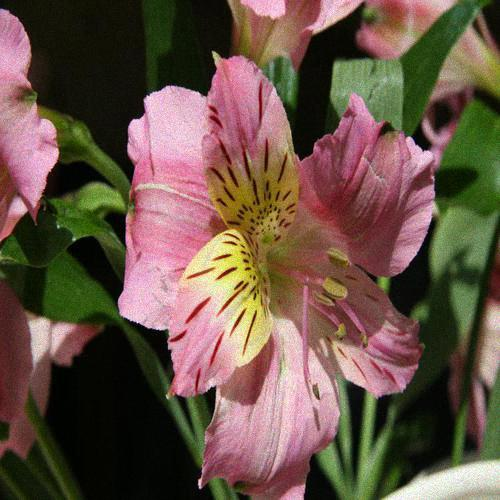

0.98354083


In [0]:
image=cv2.imread("./train/2000.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(image)
image = cv2.resize(image, (96, 96))
image1 = image.astype("float") / 255.0
image1 = img_to_array(image1)
image1 = np.expand_dims(image1, axis=0)
print(max(model.predict(image1)[0]))

In [0]:
import pickle

with open('outfile', 'wb') as fp:
    pickle.dump(data, fp)

In [0]:
import pickle
with open ('outfile', 'rb') as fp:
    data1 = pickle.load(fp)



In [0]:
imagey = cv2.imread(imagePaths[0])
imagey = cv2.resize(imagey, (96, 96))
imagey = img_to_array(imagey)
if imagey.all()==data1[0].all():
  print("hiii")

hiii


In [0]:
b=0
for i in testY[0]:
  if i==1:
    break
  b+=1
print(b)

88


In [0]:
image1 = np.expand_dims(testX[0], axis=0)
ary=model.predict(image1)[0]
print(len(ary))
op=max(ary)
b=0
for i in ary:
  if i==op:
    break
  b+=1
print(b)

103
88


In [0]:

imagePathst = sorted(list(paths.list_images("./test")))
for imagePath in imagePathst:
	# load the image, pre-process it, and store it in the data list
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (96, 96))
  image = img_to_array(image)
  image1 = image.astype("float") / 255.0
  image1 = img_to_array(image1)
  image1 = np.expand_dims(image1, axis=0)
  image1 = np.expand_dims(testX[0], axis=0)
  ary=model.predict(image1)[0]
  op=max(ary)
  b=0
  for i in ary:
    if i==op:
      break
  b+=1
  train.iloc[int(str(imagePath.split(os.path.sep)[-1])[0:-4:])]['category']=b
for index, row in df.iterrows():
    print(row['image_id'], row['category'])
    

IndexError: ignored